# 5 Advanced Modeling - Deep Learning 

In this notebook we will employ deep learning packages models on our two wells to see if we can further improve the MAPE scores compared to our base models(classical timeseries forecasting) and specialized packages models8. We will be using the following libraries Tensorflow, Pytorch.

## TABLE OF CONTENTS:
* [5.1 Import Relevant Package](#1)
* [5.2 Import CSV](#2)
* [5.3 Examine Data](#3)
* [5.4 Preprocessing and training for well with a typical decline curve profile](#4)

 <b>5.1 Import Relevant Package <b/> <a class="anchor" id="1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from array import array
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import itertools
import warnings
warnings.filterwarnings('ignore')

 <b>5.2 Import CSV <b/> <a class="anchor" id="2"></a>

In [3]:
df = pd.read_csv('Monthly.csv')

 <b>5.3 Examine Data <b/>  <a class="anchor" id="3"></a>

Drop index and level_0 columns

In [4]:
df.drop(columns=['index','level_0'], inplace=True)

Call head of data

In [5]:
df.head(2)

,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,...,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
0,2014-07-01,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,...,211.228320,0.0,22.489461,47.242292,27.762750,34.311375,631.0,0.0,0.0,0.0
1,2014-08-01,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,...,155.976129,0.0,46.416057,67.994387,55.577839,39.485194,20569.0,0.0,783.0,0.0


Make 'DATEPRD' as index

In [6]:
df.set_index('DATEPRD',inplace=True)

Call head of data.

In [7]:
df.head(2)

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,...,AVG_DP_TUBING.shifted3,AVG_ANNULUS_PRESS.shifted3,AVG_CHOKE_SIZE_P.shifted3,AVG_WHP_P.shifted3,AVG_WHT_P.shifted3,DP_CHOKE_SIZE.shifted3,BORE_OIL_VOL.shifted3,BORE_GAS_VOL.shifted3,BORE_WAT_VOL.shifted3,BORE_WI_VOL.shifted3
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2014-07-01,215.305839,108.150677,166.458710,0.0,47.269826,48.847129,56.742968,20.381968,15084.0,0.0,...,211.228320,0.0,22.489461,47.242292,27.762750,34.311375,631.0,0.0,0.0,0.0
2014-08-01,230.622097,105.879581,188.180742,0.0,29.241656,42.441258,41.679613,24.964645,6968.0,0.0,...,155.976129,0.0,46.416057,67.994387,55.577839,39.485194,20569.0,0.0,783.0,0.0


Convert index to datetime

In [8]:
df.index = pd.to_datetime(df.index)

Call shape of dataframe

In [9]:
df.shape

(285, 25)

Call column names

In [10]:
df.columns

Index(['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'NPD_WELL_BORE_NAME', 'AVG_DOWNHOLE_PRESSURE.shifted3',
       'AVG_DOWNHOLE_TEMPERATURE.shifted3', 'AVG_DP_TUBING.shifted3',
       'AVG_ANNULUS_PRESS.shifted3', 'AVG_CHOKE_SIZE_P.shifted3',
       'AVG_WHP_P.shifted3', 'AVG_WHT_P.shifted3', 'DP_CHOKE_SIZE.shifted3',
       'BORE_OIL_VOL.shifted3', 'BORE_GAS_VOL.shifted3',
       'BORE_WAT_VOL.shifted3', 'BORE_WI_VOL.shifted3'],
      dtype='object')

In [11]:
list_to_remove = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'AVG_DOWNHOLE_PRESSURE.shifted3',
       'AVG_DOWNHOLE_TEMPERATURE.shifted3', 'AVG_DP_TUBING.shifted3',
       'AVG_ANNULUS_PRESS.shifted3', 'AVG_CHOKE_SIZE_P.shifted3',
       'AVG_WHP_P.shifted3', 'AVG_WHT_P.shifted3', 'DP_CHOKE_SIZE.shifted3',
       'BORE_OIL_VOL.shifted3', 'BORE_GAS_VOL.shifted3',
       'BORE_WAT_VOL.shifted3', 'BORE_WI_VOL.shifted3']

Drop all unwanted columns.

In [12]:
df.drop(columns=list_to_remove,inplace=True)

Call head of dataframe.

In [13]:
df.head(2)

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2014-07-01,15084.0,15/9-F-1 C
2014-08-01,6968.0,15/9-F-1 C


Call tail of dataframe

In [14]:
df.tail()

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2016-03-01,3746.0,15/9-F-15 D
2016-04-01,4545.0,15/9-F-15 D
2016-05-01,4696.0,15/9-F-15 D
2016-06-01,3466.0,15/9-F-15 D
2016-07-01,828.0,15/9-F-15 D


 <b>5.4 Preprocessing and training for well with a typical decline curve profile<b/> <a class="anchor" id="4"></a>

Create dataframe df1 for F-14 well.

In [15]:
df1 = df[df['NPD_WELL_BORE_NAME'] =='15/9-F-14'].copy()

Plot oil production rate

<AxesSubplot:title={'center':'15/9-F-14'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

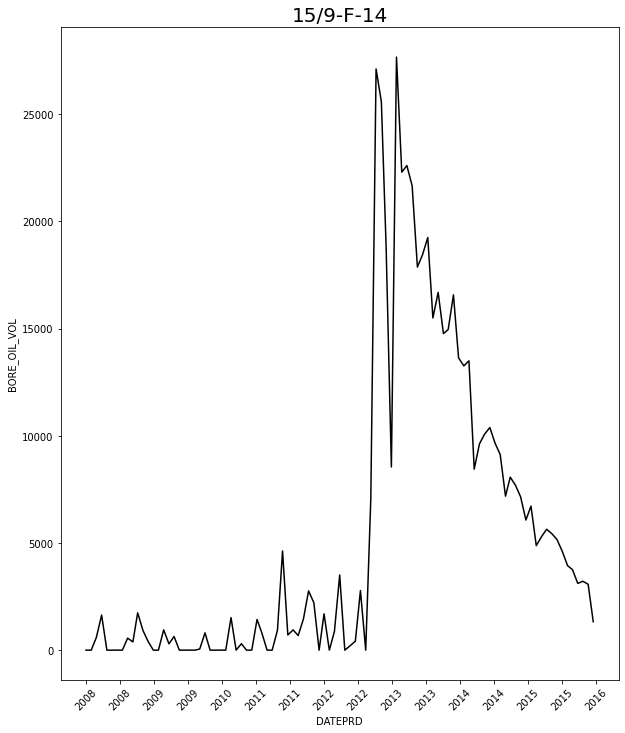

In [16]:
%matplotlib inline
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-14',size=20)
plt.xticks(rotation = 45)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df1, ax=ax, color='black')

Remove irrelevant data

In [17]:
df1= df1[df1.index >= '2013-02-01'].copy()

Plot oil production rate

<AxesSubplot:title={'center':'15/9-F-14'}, xlabel='DATEPRD', ylabel='BORE_OIL_VOL'>

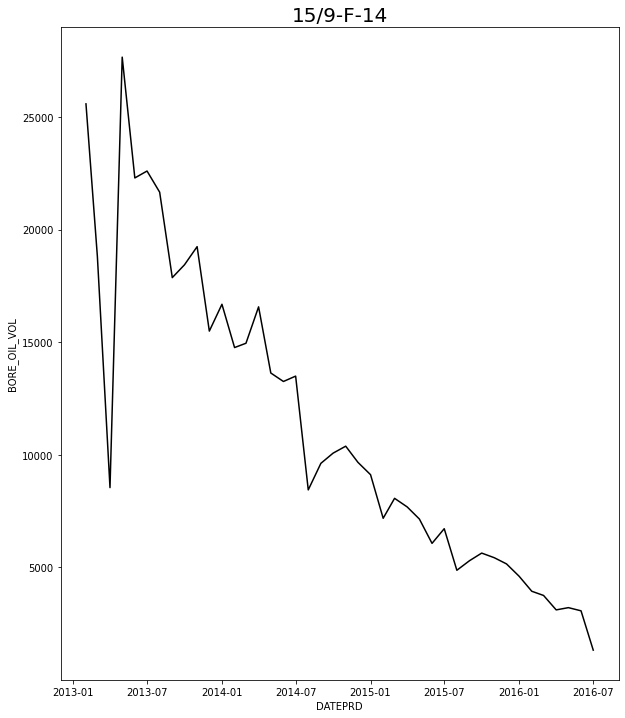

In [18]:
fig_dims = (10, 12)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('15/9-F-14',size=20)
sns.lineplot(x='DATEPRD', y='BORE_OIL_VOL', data=df1, ax=ax, color='black')

Examine dataframe shape.

In [19]:
df1.shape

(42, 2)

Call dataframe head.

In [20]:
df1.head()

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2013-02-01,25589.0,15/9-F-14
2013-03-01,18818.0,15/9-F-14
2013-04-01,8545.0,15/9-F-14
2013-05-01,27665.0,15/9-F-14
2013-06-01,22299.0,15/9-F-14


Call dataframe tail

In [21]:
df1.tail()

,BORE_OIL_VOL,NPD_WELL_BORE_NAME
DATEPRD,,
2016-03-01,3755.0,15/9-F-14
2016-04-01,3114.0,15/9-F-14
2016-05-01,3214.0,15/9-F-14
2016-06-01,3073.0,15/9-F-14
2016-07-01,1326.0,15/9-F-14


In [22]:
df1 = df1.drop(columns=['NPD_WELL_BORE_NAME'])

In [23]:
df1

,BORE_OIL_VOL
DATEPRD,
2013-02-01,25589.0
2013-03-01,18818.0
2013-04-01,8545.0
2013-05-01,27665.0
2013-06-01,22299.0
2013-07-01,22606.0
2013-08-01,21667.0
2013-09-01,17872.0
2013-10-01,18442.0


In [24]:
df1.shape

(42, 1)

 <b>5.5 TensorFlow/Keras <b/> <a class="anchor" id="5"></a>

In this section we employ the TensorFLow package using the Keras wrapper. TensorFlow is the most popular deep learning framework available in python. We develop 3 different architectures for time series forecasting using Tensorflow.

 <b>5.5.1 TensorFlow/Keras - Deep Neural Network<b/> <a class="anchor" id="6"></a>

The first Deeplearning model is a fully connected Multi-level perceptron model with 3 hidden layers. 

Define conver2matrix function. This function will take our data and prepare it for processing. 

In [25]:
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d,0])
  Y.append(data_arr[d,0])
 return np.array(X), np.array(Y)

Split data set into testing dataset and train dataset

In [26]:
train_size = 38
train, test =df1.values[0:train_size-3,:],df1.values[train_size-3:len(df1.values),:]

Define Look_back window

In [27]:
look_back = 3

Convert datast into right shape using conver2matrix function

In [28]:
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

Call trainX shape

In [29]:
trainX.shape

(32, 3)

Call testX shape

In [30]:
testX.shape

(4, 3)

Check trainY

In [31]:
trainY

array([27665., 22299., 22606., 21667., 17872., 18442., 19248., 15497.,
       16688., 14766., 14957., 16574., 13635., 13259., 13497.,  8444.,
        9623., 10076., 10385.,  9668.,  9119.,  7183.,  8069.,  7687.,
        7149.,  6069.,  6720.,  4874.,  5298.,  5637.,  5431.,  5156.])

Check testX

In [32]:
testX

array([[4607., 3942., 3755.],
       [3942., 3755., 3114.],
       [3755., 3114., 3214.],
       [3114., 3214., 3073.]])

Check testY

In [33]:
testY

array([3114., 3214., 3073., 1326.])

Build model using keras

In [34]:
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(units=6, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

Fit data to model

In [35]:
model=model_dnn(look_back)

In [36]:
history=model.fit(trainX,trainY, epochs=1000, batch_size=30, verbose=0, validation_data=(testX,testY),shuffle=False)

Predict last 4 months of production

In [37]:
test_predict = model.predict(testX)

Call Predictions

In [38]:
test_predict

array([[3670.1704],
       [3217.6543],
       [3034.698 ],
       [2833.415 ]], dtype=float32)

 <b>5.5.2 TensorFlow/Keras - LSTM<b/> <a class="anchor" id="7"></a>

Long short-term memory or LSTM is an artificial recurrent neural network (RNN) architecture that unlike standard feedforward neural networks has feedback connection/s. LSTMS are well-suited to classifying, processing, and making predictions based on time series data. 

Create prepare_data function for preparing independent and dependent features


In [39]:
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

Create training data

In [40]:
df1train = df1[:-4]

Define input sequence

In [41]:
timeseries_data = list(df1train['BORE_OIL_VOL'])

Choose a number of time steps

In [42]:
n_steps = 3

Split into samples

In [43]:
X, y = prepare_data(timeseries_data, n_steps)

Reshape from [samples, timesteps] into [samples, timesteps, features]

In [44]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Call shape of input array

In [45]:
X.shape

(35, 3, 1)

Define LSTM model with 2 hidden layers

In [46]:
model2 = Sequential()
model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

Fit model

In [47]:
model.fit(X, y, epochs=3000, verbose=0)

Predict last 4 months

In [48]:
x_input =np.array([4607,3942,3755])
temp_input=list(x_input)
lst_output = []
i=0
while(i<4):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[311.98538]
1 day input [3942.         3755.          311.98538208]
1 day output [[-118.936104]]
2 day input [3755.          311.98538208 -118.93610382]
2 day output [[-105.33071]]
3 day input [ 311.98538  -118.936104 -105.33071 ]
3 day output [[-4.0494533]]
[311.98538, -118.936104, -105.33071, -4.0494533]


 <b>5.5.3 TensorFlow/Keras - CNN<b/> <a class="anchor" id="8"></a>

CNNs or Convolutional Neural Network models are is a class of artificial neural network ANN, most commonly applied to analyze visual imagery. CNNs are also known as Shift invariant or space Invariant Artificial Neural Networks (SIANN) based on the shared-weight architecture of the convolution kernels or filters that slide along inout features and provide translation-equivalent responses known as feature maps (Source: Wikipedia).

In [49]:
y.shape

(35,)

In [50]:
type(X)

numpy.ndarray

In [51]:
type(y)

numpy.ndarray

Define model


In [52]:
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

Fit model

In [53]:
model3.fit(X, y, epochs=3000, verbose=0)

Predict last 4 months

In [54]:
initial_input = [4607,3942,3755]
predictions = []
for num in range(4):
    x_input = array(initial_input[-3:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model3.predict(x_input, verbose=0)
    list1 = list(itertools.chain(*yhat))
    initial_input = initial_input+ list1
    predictions = predictions + list1

Call Predictions

In [55]:
print(predictions)

[3745.0715, 3309.8281, 3194.3123, 3072.655]


 <b>5.6 Preprocessing and training for well that does not have typical decline curve profile <b/> <a class="anchor" id="19"></a><b/> <a class="anchor" id="4"></a>